# <font color = red> - Gorjeta ('tips')

#### Variáveis

total_bill ===> Total da conta <br>
tip ===> Total da Gorjeta <br>
sex ===> O sexo da pessoa que pagou a conta (Female = Mulher ; Male = Homem)<br>
smoker ===> Fumante <br>
day ===> Dia da semana <br>
time ===> Qual o tipo de refeição (Dinner = janta; Lunch = almoço)<br>
size ===> Tamanho da mesa<br>

## <font color = green> - Importar as bibliotecas Seaborn, Pandas, Numpy e Matplotlib 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- <font color = green> - Criar um data frame

In [2]:
df = sns.load_dataset('tips')

- <font color = green> - Visualizar o Dataframe

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- <font color = green> - Visualizar a tipagem das variáveis

In [4]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

- <font color = green> - Visualizar a quantidade de linhas e colunas

In [5]:
df.shape

(244, 7)

<font color = green> - Visualizar os atributos únicos das variáveis

In [6]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

- <font color = green> - Visualizar os atributos da variável 'time'

In [7]:
df['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

- Frequência de pessoas agrupadas pelas variáveis `'sex'` e `'day'`

In [8]:
df.groupby(['sex', 'day']).size()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
dtype: int64

- Adicionar uma coluna chamada frequência pas as pessoas agrupadas pelas variáveis `'sex'` e `'day'`

In [9]:
df.groupby(['sex', 'day']).size().reset_index(name='Freq')

,sex,day,Freq
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


## <font color = red> # `crosstab`

- Tabela cruzada

##### Referência
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

In [10]:
pd.crosstab(df.smoker, df.time)

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


- Colocar a soma dos valores em uma linha e coluna

In [11]:
pd.crosstab(df.smoker, df.time, margins = True, margins_name = 'Total')

time,Lunch,Dinner,Total
smoker,,,
Yes,23,70,93
No,45,106,151
Total,68,176,244


- Percentual dos valores em relação a variável que está na coluna

In [12]:
pd.crosstab(df.smoker, df.time, normalize = 'columns')

time,Lunch,Dinner
smoker,,
Yes,0.338235,0.397727
No,0.661765,0.602273


- Arredondar para 2 digito.

In [13]:
pd.crosstab(df.smoker, df.time, normalize = 'columns').round(2)

time,Lunch,Dinner
smoker,,
Yes,0.34,0.4
No,0.66,0.6


- Percentual de valores em relação a variável que esta na linha

In [14]:
pd.crosstab(df.smoker, df.time,  normalize = 'index').round(2)

time,Lunch,Dinner
smoker,,
Yes,0.25,0.75
No,0.30,0.70


- Percentual em relação ao total

In [15]:
pd.crosstab(df.smoker, df.time, normalize = True, margins = True, margins_name = 'Total').round(2)

time,Lunch,Dinner,Total
smoker,,,
Yes,0.09,0.29,0.38
No,0.18,0.43,0.62
Total,0.28,0.72,1.00


- Tabela cruzada em relação a uma terceira variável e aplicando alguma medida estatística

In [16]:
# Saber a quantidade em média das gorjetas seguindo a relação time e smoker
pd.crosstab(df.smoker, df.time,  margins=True, margins_name="Total", values=df.tip, aggfunc= np.mean).round(2)

time,Lunch,Dinner,Total
smoker,,,
Yes,2.83,3.07,3.01
No,2.67,3.13,2.99
Total,2.73,3.10,3.00


## <font color = red> - Medidas Estatísticas
`np.mean` ou `st.tmean` ===> Média<br>
`np.median` ===> Mediana<br>
`st.mode` ===> Moda<br>
`np.var` ou `st.tvar` ===> Variância<br>
`np.std` ou `st.tstd` ===> Desvio Padrão<br>
`np.sum` ===> Soma<br>
`'count'` ===> Contar Valores<br>
`'nunique'` ===> Quantos Valores Diferentes tem<br>
`min` ou `st.tmin` ===> Valor Mínimo<br>
`max` ou `st.tmax` ===> Valor Máximo<br>
`np.ptp` ===> Amplitude<br>
`st.sem` ===> Erro Padrão<br>

In [17]:
pd.crosstab(df.smoker, df.time,  margins=True, margins_name="Total", values=df.tip, aggfunc= np.mean).round(2)

time,Lunch,Dinner,Total
smoker,,,
Yes,2.83,3.07,3.01
No,2.67,3.13,2.99
Total,2.73,3.10,3.00


## <font color = red> - Tabela cruzada agrupada

In [18]:
pd.crosstab(df.smoker, [df.sex, df.time],margins=True, margins_name="Total", values=df.tip, aggfunc= np.mean).round(2)

sex     Male        Female        Total
time   Lunch Dinner  Lunch Dinner      
smoker                                 
Yes     2.79   3.12   2.89   2.95  3.01
No      2.94   3.16   2.46   3.04  2.99
Total   2.88   3.14   2.58   3.00  3.00

In [19]:
pd.crosstab([df.smoker, df.sex], df.time ,margins=True, margins_name="Total", values=df.tip, aggfunc= np.mean).round(2)

time           Lunch  Dinner  Total
smoker sex                         
Yes    Male     2.79    3.12   3.05
       Female   2.89    2.95   2.93
No     Male     2.94    3.16   3.11
       Female   2.46    3.04   2.77
Total           2.73    3.10   3.00

## <font color = red> # `sns.heatmap`

- Visualização de tabela cruzada em mapa decalor

##### Referência
https://seaborn.pydata.org/generated/seaborn.heatmap.html

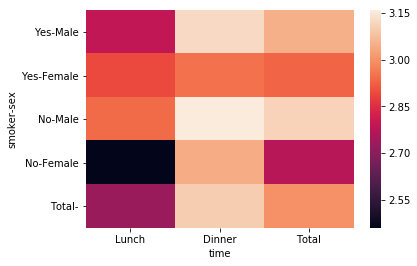

In [20]:
sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values=df.tip, 
                        aggfunc = np.mean))
plt.show()

- `annot = True` ===> colocar os valores dentro dos quadrados

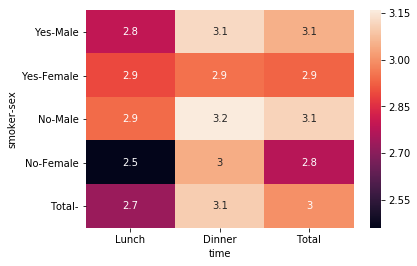

In [21]:
# Para o Mapa de Calor é preciso colocar em uma variável
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values=df.tip, 
                             aggfunc = np.mean), annot = True)
plt.show()

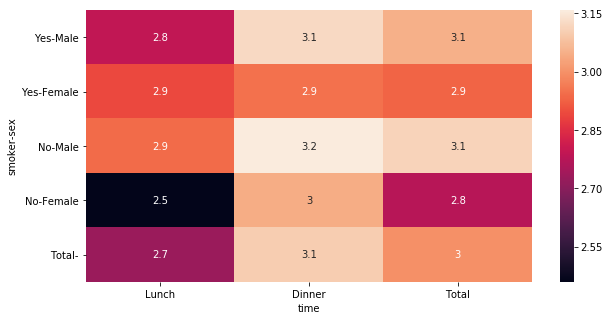

In [22]:
# Aumentar o tamanho do mapa de calor
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values = df.tip,
                             aggfunc = np.mean), annot = True)

- `fmt` ===> Arredondar os valores dentro dos quadrados

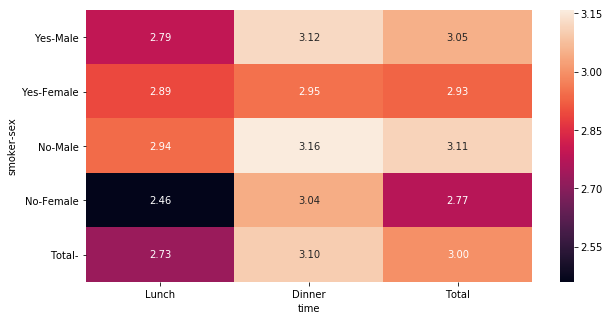

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values=df.tip,
                             aggfunc = np.mean), annot = True, fmt = '.2f')

- `linewidths` ===> Separar os quadrados

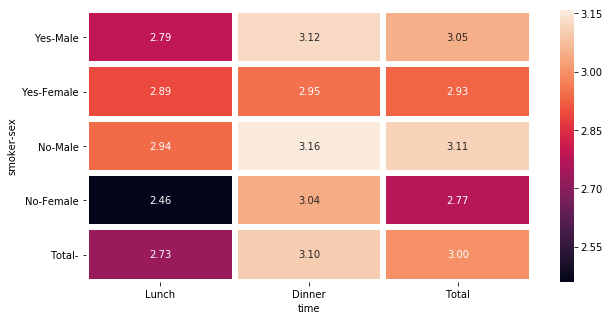

In [24]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values = df.tip,
                             aggfunc = np.mean), annot = True, fmt = '.2f', linewidths = 5)

## <font color = red> - Paleta de Cores

##### Referência

https://seaborn.pydata.org/tutorial/color_paletles.html

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

- `cmap` ===> Cores

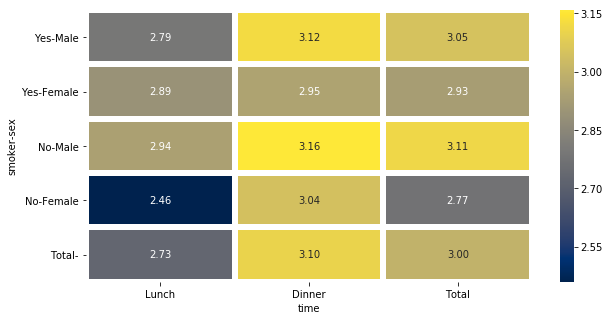

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values = df.tip,
                             aggfunc = np.mean), annot = True, fmt= '.2f', linewidths = 5, cmap = 'cividis')

- `annot_kws={'size': xx}` ===> Tamanho da fonte

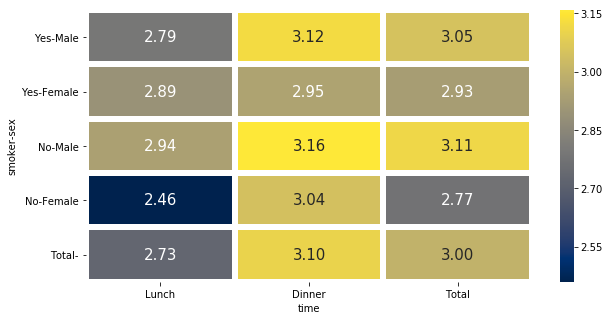

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values = df.tip,
                             aggfunc= np.mean), annot = True, fmt = '.2f', linewidths = 5, cmap = 'cividis',
                 annot_kws={'size': 15})

- Colocar um título no Mapa de Calor

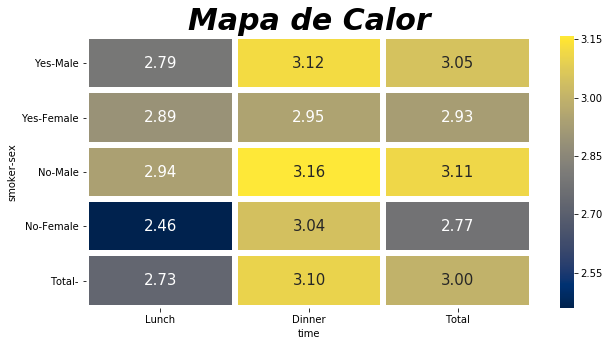

In [27]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values=df.tip,
                             aggfunc = np.mean), annot = True, fmt= '.2f', linewidths = 5, cmap = 'cividis',
                 annot_kws={'size': 15})
ax.set_title('Mapa de Calor', size  = 30, color = '#000000', weight = 'bold', style = 'italic')
plt.show()

- `square = True` ===> para colocar os quadrados do mesmo tamanho

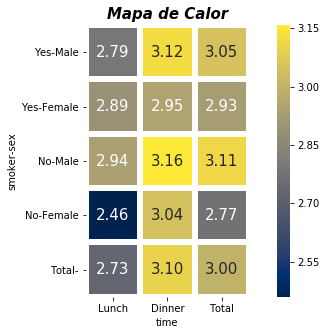

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], df.time, margins = True, margins_name = 'Total', values=df.tip,
                             aggfunc = np.mean), annot = True, fmt= '.2f', linewidths = 5, cmap = 'cividis',
                 annot_kws={'size': 15}, square=True)
ax.set_title('Mapa de Calor', size  = 15, color = '#000000', weight = 'bold', style = 'italic')
plt.show()

## <font color = red> - Gráficos para tabela cruzada

## <font color = red> # `FacetGrid`

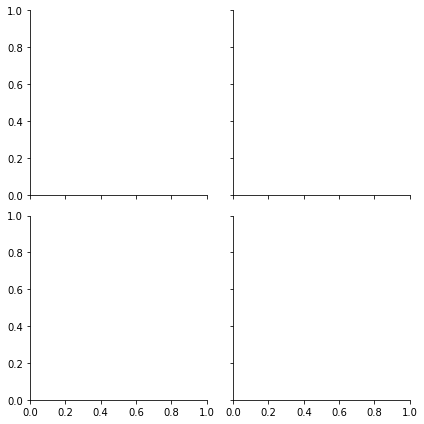

In [29]:
sns.FacetGrid(df, col = 'time', row = 'sex')
plt.show()

#obs: não é necessário colocar col e nem row.
# O primeiro argumento vai ser a coluna e o segundo vai ser a linha

## <font color = red> - Histograma

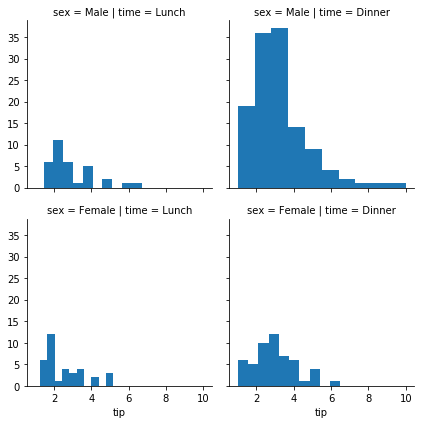

In [30]:
# Para usar o FacetGrid é preciso criar uma variável e utilizar o argumento map para mostrar o que se quer fazer
graf1= sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.hist, 'tip')
plt.show()

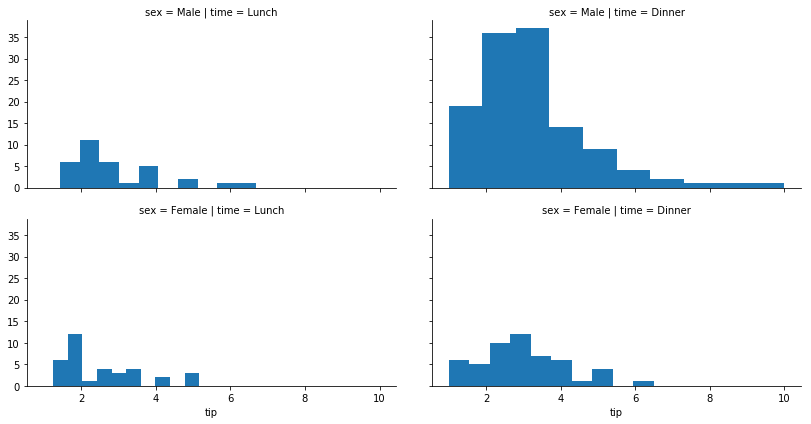

In [31]:
# Aumentar o tamanho da figura
graf1= sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.hist, 'tip')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

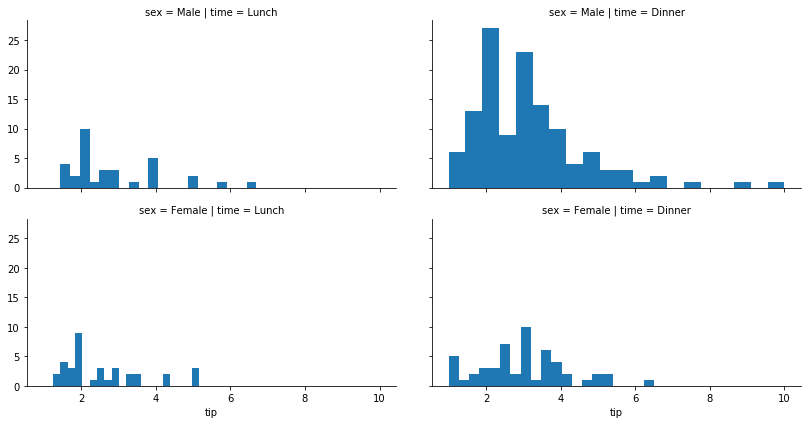

In [32]:
# `bins`, acrescentar mais barras
graf1= sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.hist, 'tip', bins = 20)
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

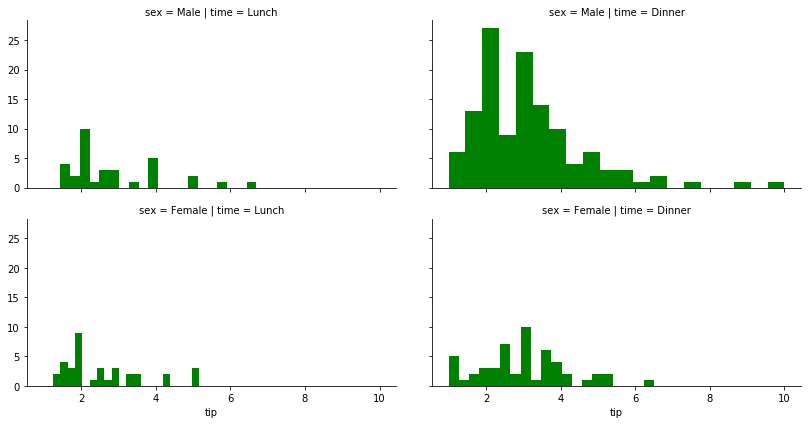

In [33]:
#Alterar a cor
graf1 = sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.hist,'tip', bins = 20, color = 'g')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

## <font color = red> - FacetGrid para Gráfico de Dispersão
- Verificar a relação entre as duas variáveis `'total_bill'` e `'tip`'

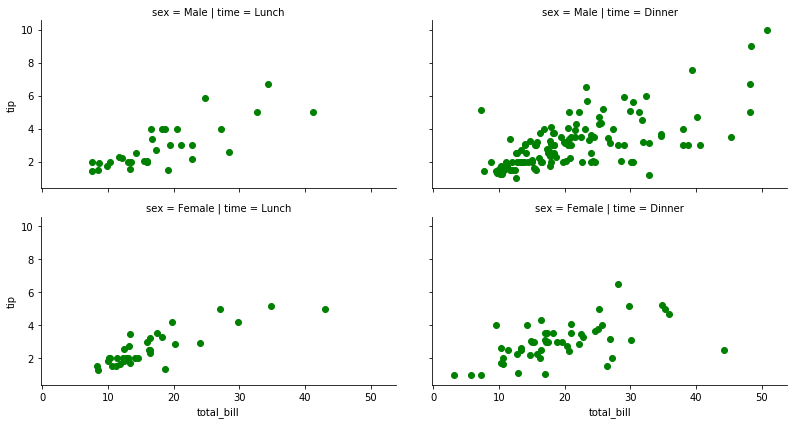

'\nRelação crescente entre a Conta e a gorjeta, ou seja, quanto maior o valor da conta maior o valor da gorjeta\n'

In [34]:
graf1 = sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.scatter, 'total_bill', 'tip', color = 'g')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

'''
Relação crescente entre a Conta e a gorjeta, ou seja, quanto maior o valor da conta maior o valor da gorjeta
'''

- `edgecolor = 'w'` ===> Faz com que o gráfco fique mais clean

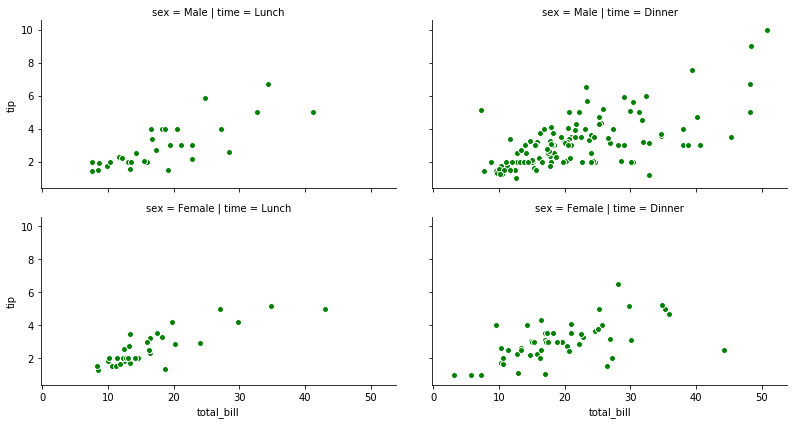

In [35]:
graf1 = sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.scatter, 'total_bill', 'tip', color = 'g', edgecolor = 'w')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

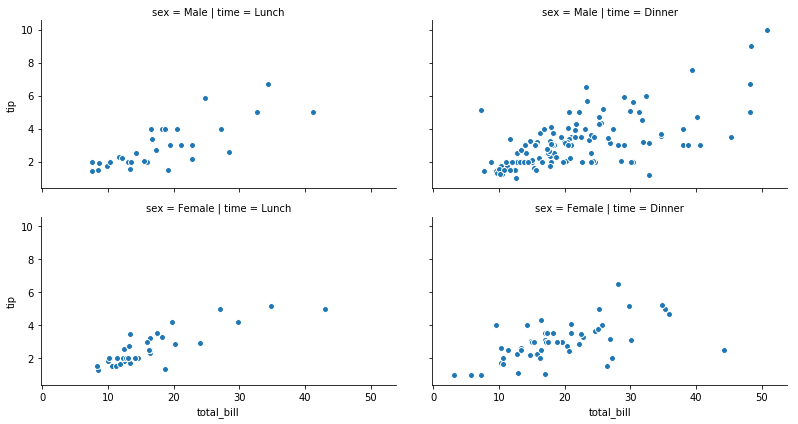

In [36]:
# Retirar color = 'g'

graf1 = sns.FacetGrid(df, col = 'time', row = 'sex')
graf1.map(plt.scatter, 'total_bill', "tip", edgecolor = 'w')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

- `hue` ===> Agrupar

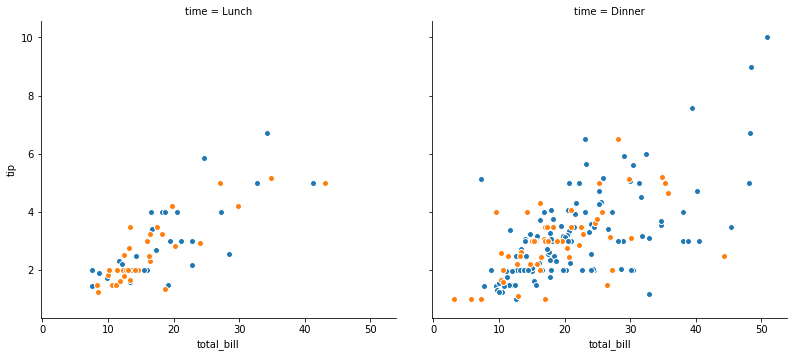

In [37]:
# Substituir row por hue

graf1 = sns.FacetGrid(df, col = 'time', hue = 'sex')
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

- Adicionar a legenda

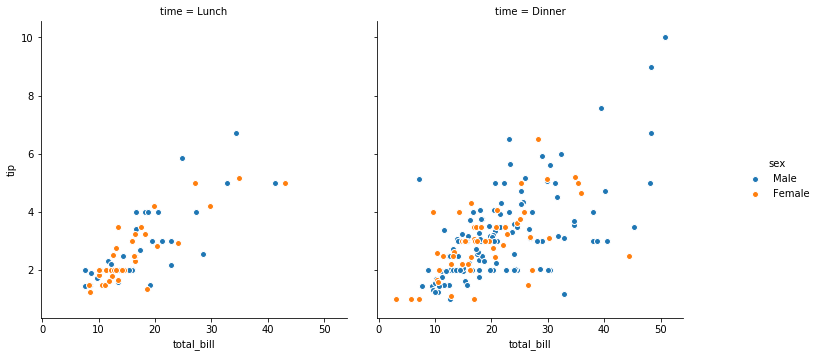

In [38]:
graf1 = sns.FacetGrid(df, col = 'time', hue = 'sex')
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w').add_legend()
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

- `col_order` ===> Colocar as colunas na orque que se quer

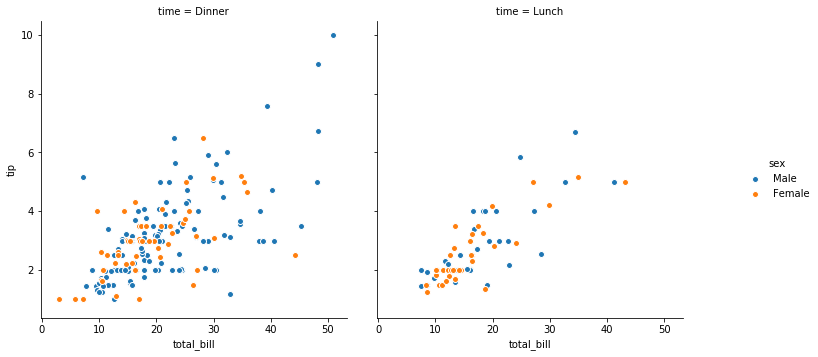

In [39]:
#Trocar a ordem
graf1 = sns.FacetGrid(df, col = 'time', hue = 'sex', col_order = ['Dinner', 'Lunch'])
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w').add_legend()
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

- `palette` ===> Mudar as cores

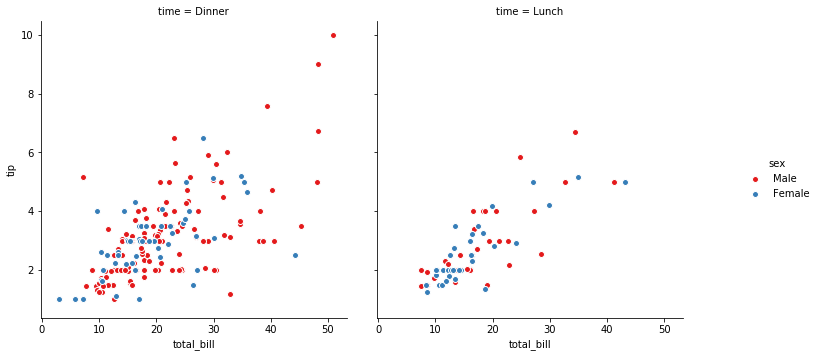

In [40]:
graf1 = sns.FacetGrid(df, col = 'time', hue = 'sex', col_order = ['Dinner', 'Lunch'], palette = 'Set1')
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w').add_legend()
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

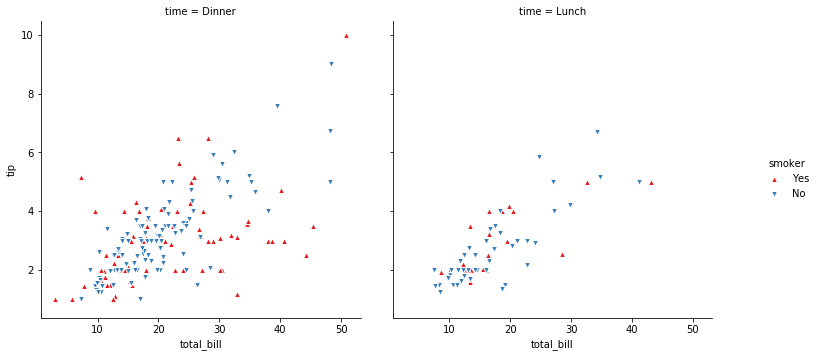

In [41]:
# Mudar a forma 
graf1 = sns.FacetGrid(df, col = 'time', hue = 'smoker', col_order = ['Dinner', 'Lunch'],
                      palette = 'Set1', hue_kws = {'marker': ['^', 'v']})
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w').add_legend()
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

## <font color = red> - Boxplot - Comparação entre argumentos de uma variável

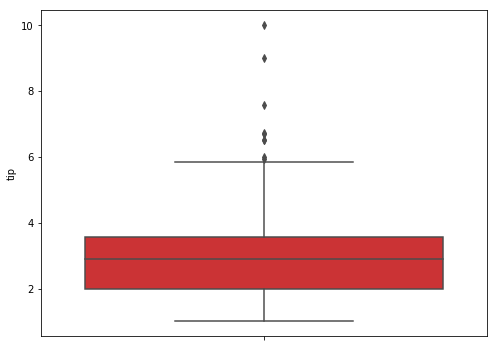

In [42]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.boxplot(y ='tip', data = df, palette = 'Set1')
plt.show()

- Boxplot comparação entre argumentos de uma variável

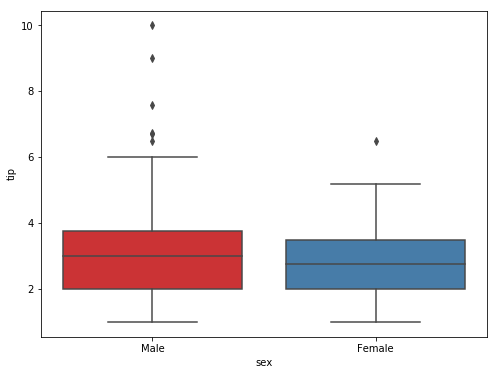

In [43]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.boxplot('sex', 'tip', data = df, palette = 'Set1')
plt.show()

- Boxplot, agrupamento por variável

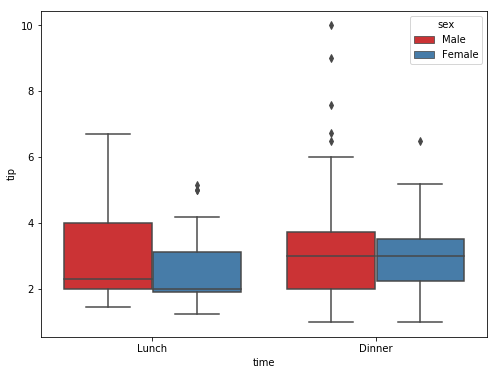

In [44]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.boxplot('time', 'tip', data = df, palette = 'Set1', hue = 'sex')
plt.show()

## <font color = red> - FacetGrid para Boxplot

C:\Users\Erivelton\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


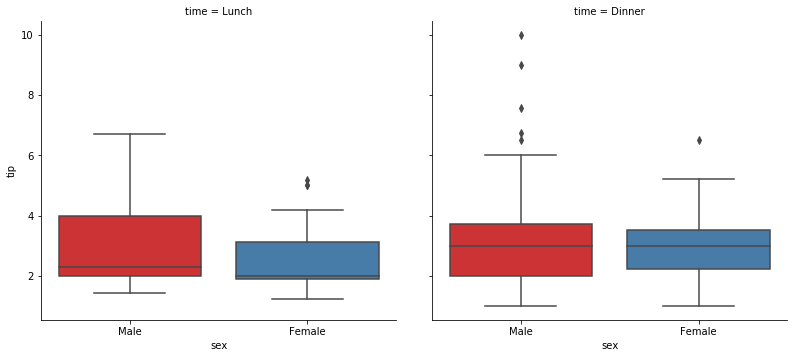

In [45]:
graf1 = sns.FacetGrid(df, col = 'time')
graf1.map(sns.boxplot, 'sex', 'tip', palette='Set1')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

## <font color = red> - Gráfico de Barra - Comparação entre argumentos de uma variável

C:\Users\Erivelton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


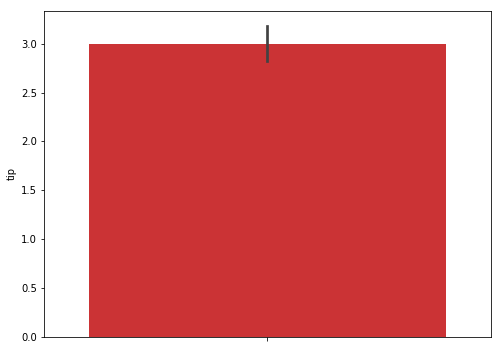

In [46]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.barplot(y = 'tip', data = df, palette='Set1')
plt.show()

- Gráfico de Barra comparação entre argumentos de uma variável

C:\Users\Erivelton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


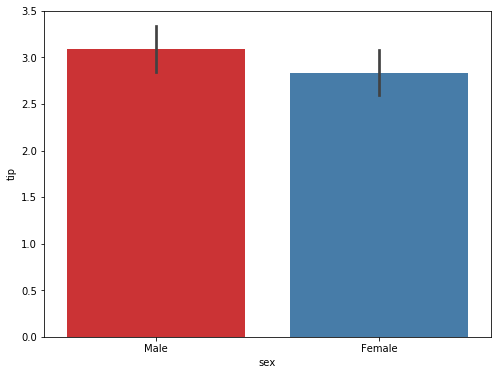

In [47]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.barplot('sex', 'tip', data = df, palette='Set1')
plt.show()

C:\Users\Erivelton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


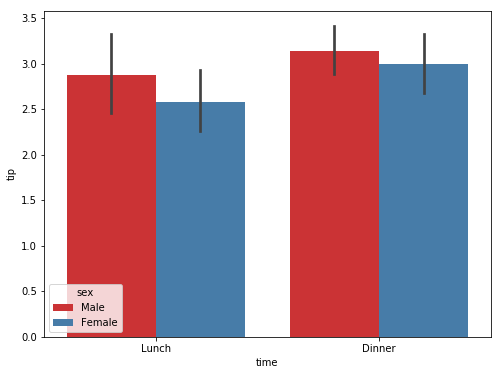

In [48]:
fig, ax = plt.subplots(figsize = (8,6)) 
sns.barplot('time', 'tip', data = df, palette = 'Set1', hue = 'sex')
plt.show()

## <font color = red> - FacetGrid para Gráfico de Barra

C:\Users\Erivelton\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Erivelton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


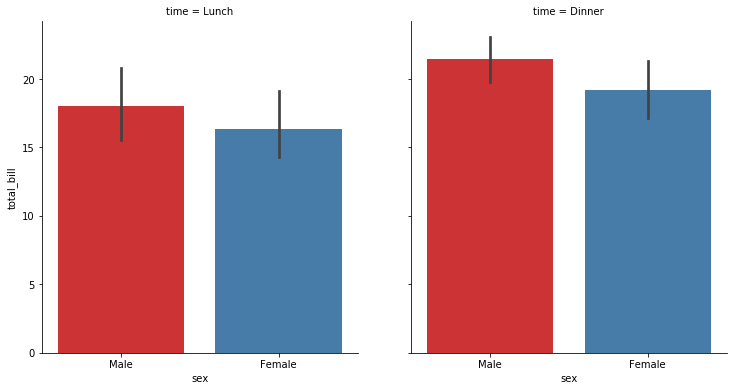

In [49]:
graf1 = sns.FacetGrid(df, col = 'time', height=4, aspect=.5)
graf1.map(sns.barplot, 'sex', 'total_bill', palette='Set1')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

# <font color = red> <h3 align = 'center'>  Exercício</h3> 

1 - Fazer um Boxplot comparando as gorjetas dadas pelos dias das semanas e separando em colunas a variável sexo.

C:\Users\Erivelton\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


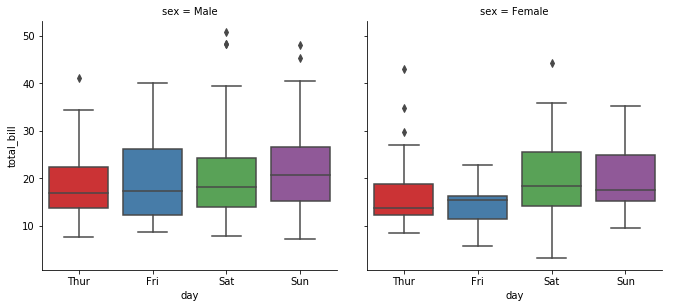

In [50]:
ex01 = sns.FacetGrid(df, col = 'sex')
ex01.map(sns.boxplot, 'day', 'total_bill', palette='Set1')
ex01.fig.set_figheight(5) # height = altura
ex01.fig.set_figwidth(10) # width = largura
plt.show()

2 - Qual é o perfil em média da pessoa que dar as maiores gorjetas.

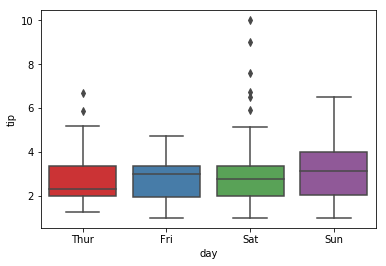

In [54]:
sns.boxplot('day', "tip", data = df, palette='Set1')
plt.show()

In [51]:
pd.crosstab([df.smoker, df.sex], [df.day, df.time], margins=True, margins_name = 'Total',
            values = df.tip, aggfunc = np.mean).round(2)

day            Thur          Fri           Sat    Sun Total
time          Lunch Dinner Lunch Dinner Dinner Dinner      
smoker sex                                                 
Yes    Male    3.06    NaN  1.90   3.25   2.88   3.52  3.05
       Female  2.99    NaN  2.66   2.70   2.87   3.50  2.93
No     Male    2.94    NaN   NaN   2.50   3.26   3.12  3.11
       Female  2.44    3.0  3.00   3.25   2.72   3.33  2.77
Total          2.77    3.0  2.38   2.94   2.99   3.26  3.00

2.1 - Fazer um mapa de calor com as informações do exercício 2

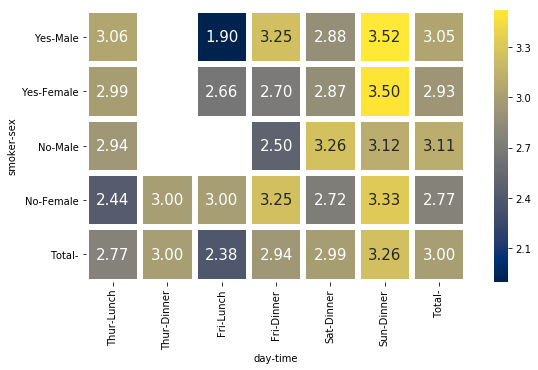

In [52]:
fix, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(pd.crosstab([df.smoker, df.sex], [df.day, df.time], margins=True, margins_name = 'Total', values = df.tip,
                             aggfunc = np.mean), annot = True, fmt = '.2f', linewidths = 5, cmap = 'cividis',
                 annot_kws = {'size': 15}, square = True)
plt.show()

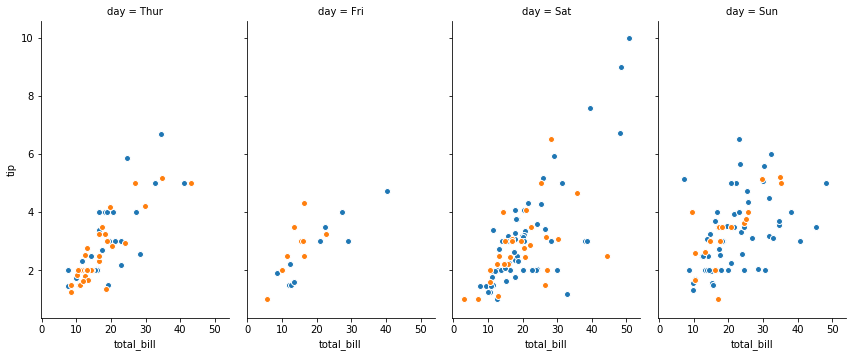

In [55]:
# Substituir row por hue

graf1 = sns.FacetGrid(df, col = 'day', hue = 'sex')
graf1.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w')
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()

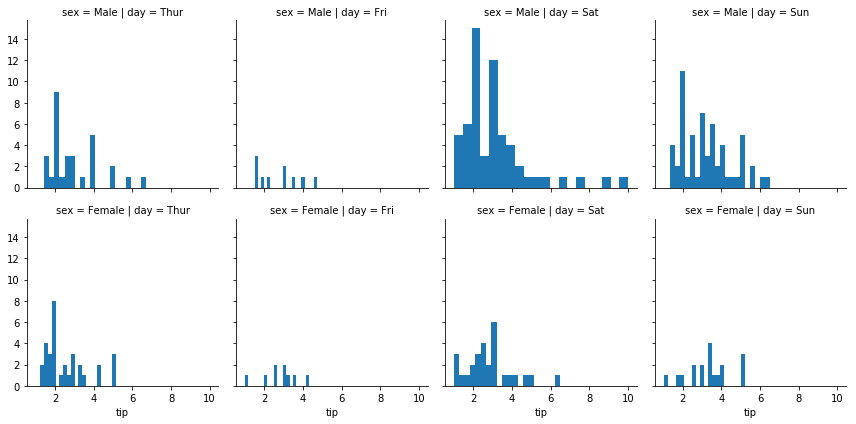

In [57]:
#Alterar a cor
graf1 = sns.FacetGrid(df, col = 'day', row = 'sex')
graf1.map(plt.hist,'tip', bins = 20)
graf1.fig.set_figheight(6) # height = altura
graf1.fig.set_figwidth(12) # width = largura
plt.show()